<a href="https://colab.research.google.com/github/Fabdev12/Desafio-Alura/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

dados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

dados.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento



In [8]:

dados["Faturamento"] = dados["Preço"]  # Já é o valor total por compra

faturamento_lojas = dados.groupby("loja")["Faturamento"].sum().sort_values(ascending=False)

display(faturamento_lojas)

,Faturamento
loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


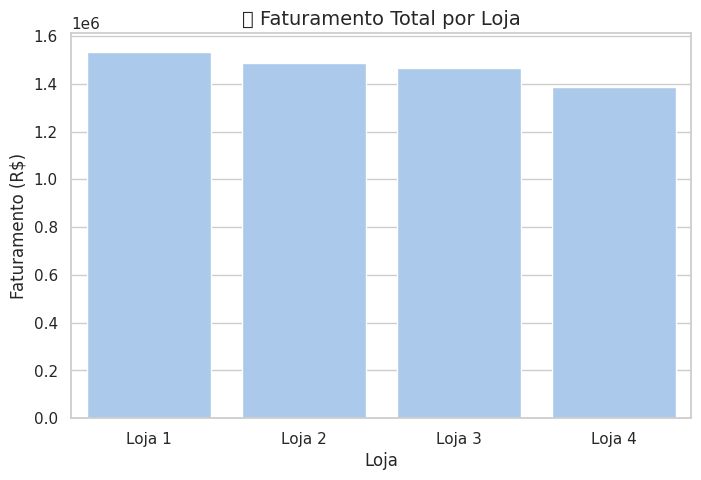

In [9]:

plt.figure(figsize=(8,5))
sns.barplot(x=faturamento_lojas.index, y=faturamento_lojas.values)
plt.title("💰 Faturamento Total por Loja", fontsize=14)
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.show()

# 2. Vendas por Categoria

In [10]:
categorias_populares = dados.groupby(["loja", "Categoria do Produto"])["Produto"].count().reset_index()
categorias_populares = categorias_populares.rename(columns={"Produto": "Quantidade"})

top_categorias = categorias_populares.sort_values(["loja", "Quantidade"], ascending=[True, False]).groupby("loja").head(3)
display(top_categorias)


,loja,Categoria do Produto,Quantidade
6,Loja 1,moveis,465
2,Loja 1,eletronicos,448
0,Loja 1,brinquedos,324
14,Loja 2,moveis,442
10,Loja 2,eletronicos,422
8,Loja 2,brinquedos,313
22,Loja 3,moveis,499
18,Loja 3,eletronicos,451
16,Loja 3,brinquedos,315
30,Loja 4,moveis,480


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


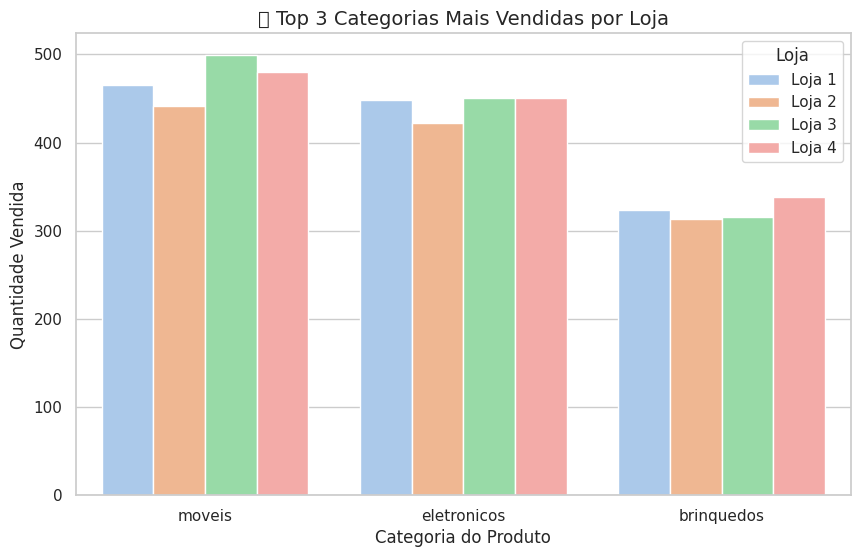

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_categorias, x="Categoria do Produto", y="Quantidade", hue="loja")
plt.title("🛍️ Top 3 Categorias Mais Vendidas por Loja", fontsize=14)
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade Vendida")
plt.legend(title="Loja")
plt.xticks(rotation=0)
plt.show()

# 3. Média de Avaliação das Lojas


In [13]:
media_avaliacao = dados.groupby("loja")["Avaliação da compra"].mean().round(2)
display(media_avaliacao)

,Avaliação da compra
loja,
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


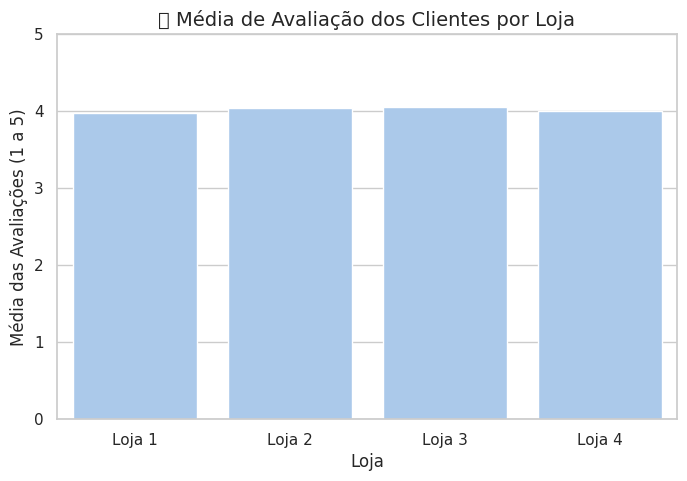

In [14]:

plt.figure(figsize=(8,5))
sns.barplot(x=media_avaliacao.index, y=media_avaliacao.values)
plt.title("⭐ Média de Avaliação dos Clientes por Loja", fontsize=14)
plt.ylabel("Média das Avaliações (1 a 5)")
plt.xlabel("Loja")
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [16]:

produtos_vendidos = dados.groupby(["loja", "Produto"])["Produto"].count().reset_index(name="Quantidade")

top5 = produtos_vendidos.sort_values(["loja", "Quantidade"], ascending=[True, False]).groupby("loja").head(3)

bottom5 = produtos_vendidos.sort_values(["loja", "Quantidade"], ascending=[True, True]).groupby("loja").head(3)

display(top5)
display(bottom5)

,loja,Produto,Quantidade
24,Loja 1,Guarda roupas,60
37,Loja 1,Micro-ondas,60
47,Loja 1,TV Led UHD 4K,60
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
134,Loja 3,Kit banquetas,57
111,Loja 3,Cama king,56
138,Loja 3,Mesa de jantar,56
161,Loja 4,Cama box,62


,loja,Produto,Quantidade
11,Loja 1,Celular ABXY,33
26,Loja 1,Headset,33
41,Loja 1,Panela de pressão,35
82,Loja 2,Jogo de tabuleiro,32
78,Loja 2,Impressora,34
87,Loja 2,Mesa de jantar,34
105,Loja 3,Blocos de montar,35
131,Loja 3,Jogo de copos,36
139,Loja 3,Micro-ondas,36
178,Loja 4,Guitarra,33


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


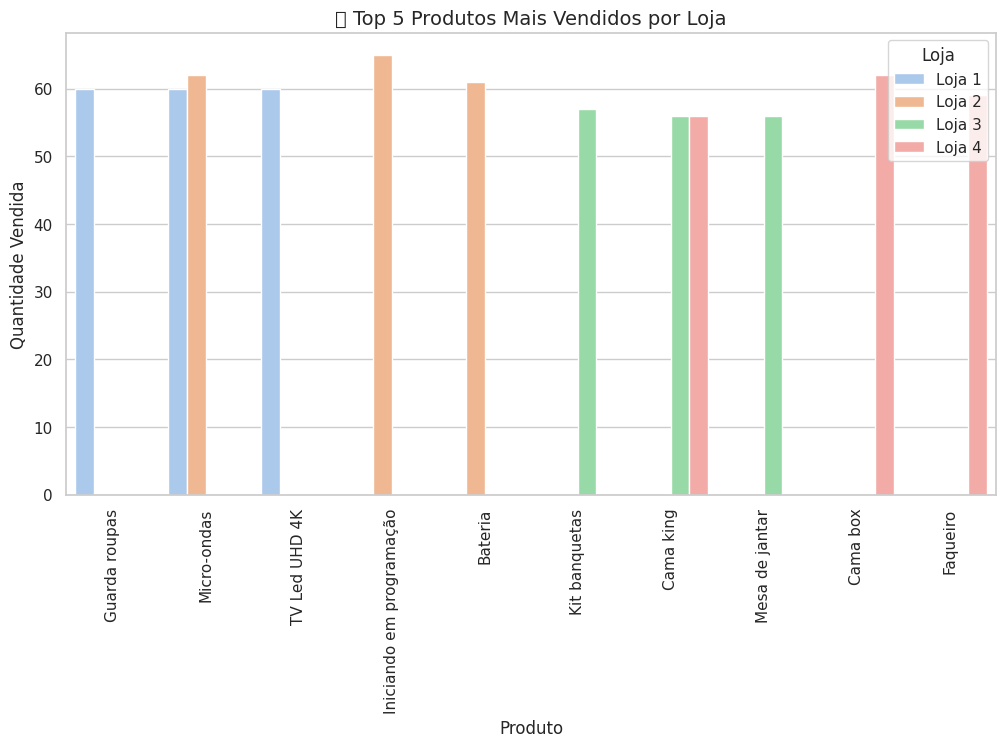

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


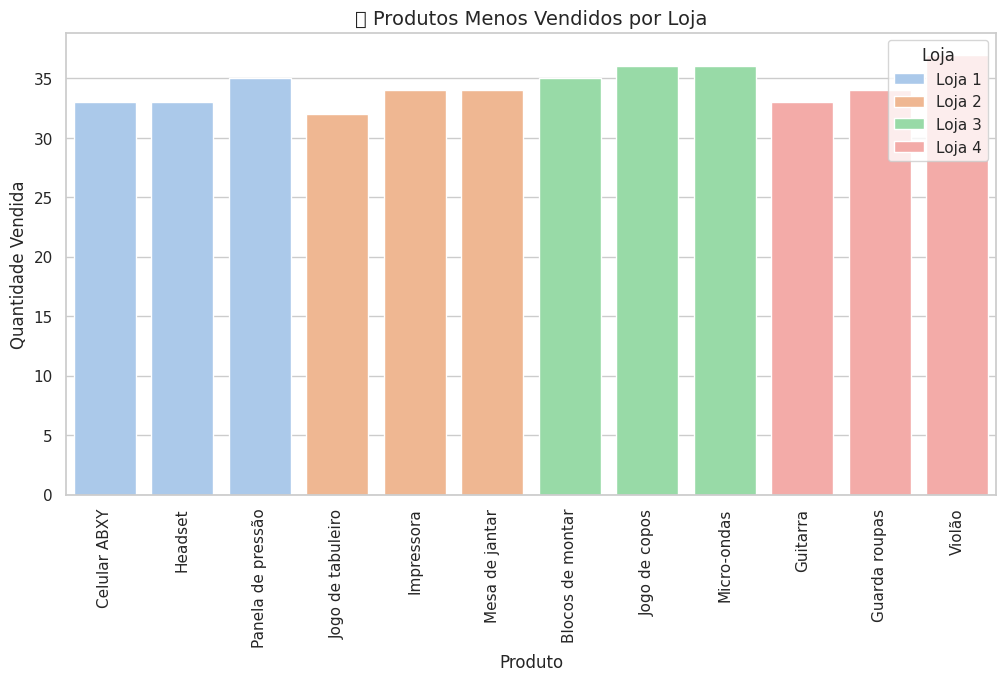

In [19]:
# mais vendidos
plt.figure(figsize=(12,6))
sns.barplot(data=top5, x="Produto", y="Quantidade", hue="loja")
plt.title("📦 Top 3 Produtos Mais Vendidos por Loja", fontsize=14)
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=90)
plt.legend(title="Loja")
plt.show()

# menos vendidos
plt.figure(figsize=(12,6))
sns.barplot(data=bottom5, x="Produto", y="Quantidade", hue="loja")
plt.title("📦 Produtos Menos Vendidos por Loja", fontsize=14)
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=90)
plt.legend(title="Loja")
plt.show()

# 5. Frete Médio por Loja

In [20]:
frete_medio = dados.groupby("loja")["Frete"].mean().round(2)
display(frete_medio)

,Frete
loja,
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


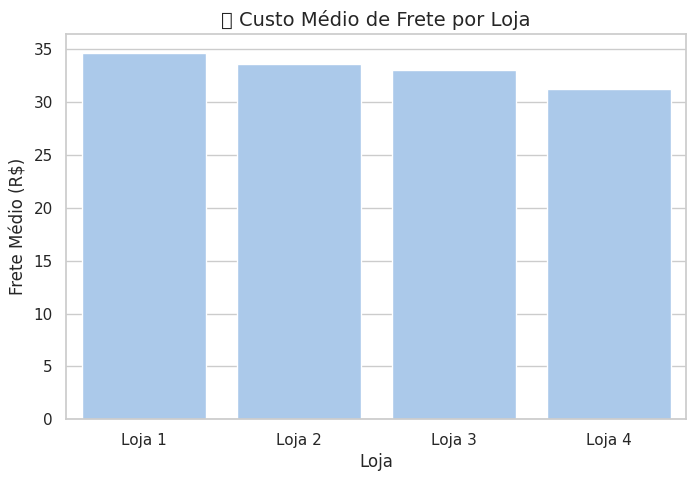

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=frete_medio.index, y=frete_medio.values)
plt.title("🚚 Custo Médio de Frete por Loja", fontsize=14)
plt.ylabel("Frete Médio (R$)")
plt.xlabel("Loja")
plt.show()

,Faturamento Total (R$),Média Avaliação,Frete Médio (R$)
loja,,,
Loja 1,1534509.12,3.98,34.69
Loja 2,1488459.06,4.04,33.62
Loja 3,1464025.03,4.05,33.07
Loja 4,1384497.58,4.00,31.28


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


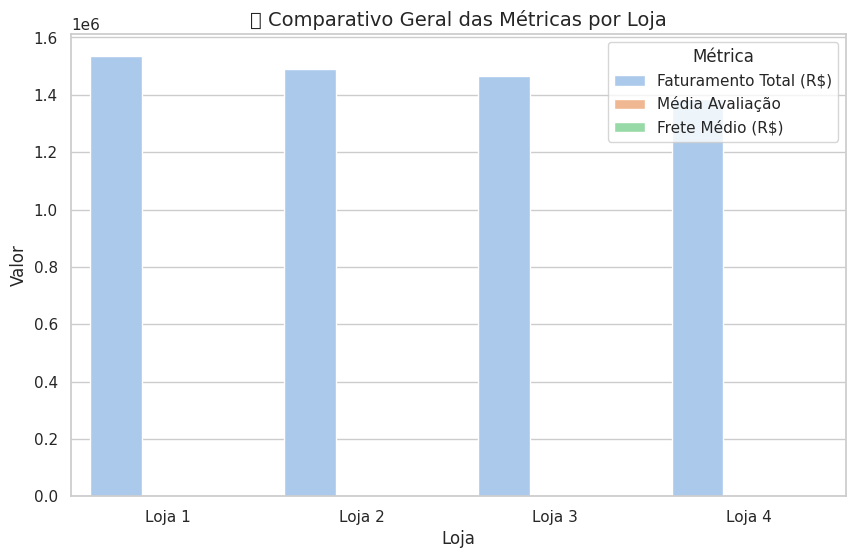

In [22]:
resumo = pd.DataFrame({
    "Faturamento Total (R$)": faturamento_lojas,
    "Média Avaliação": media_avaliacao,
    "Frete Médio (R$)": frete_medio
})

display(resumo.sort_values("Faturamento Total (R$)", ascending=False))

resumo_plot = resumo.reset_index().melt(id_vars="loja", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(10,6))
sns.barplot(data=resumo_plot, x="loja", y="Valor", hue="Métrica")
plt.title("📊 Comparativo Geral das Métricas por Loja", fontsize=14)
plt.xlabel("Loja")
plt.ylabel("Valor")
plt.legend(title="Métrica")
plt.show()

# Relatório
Relatório de Análise de Vendas e Desempenho das Lojas – Allure Store
1. Introdução

O presente relatório tem como objetivo auxiliar o Senhor João na decisão sobre qual das quatro lojas da rede Allure Store deve ser vendida, de forma a viabilizar investimentos em um novo negócio. Para isso, foram analisadas diversas métricas de desempenho relacionadas às vendas, satisfação dos clientes e custos operacionais. As análises foram realizadas com base nos dados disponibilizados para as lojas 1, 2, 3 e 4.

As métricas utilizadas foram:

Faturamento total por loja;

Categorias de produtos mais e menos vendidas;

Média das avaliações dos clientes;

Produtos mais e menos vendidos;

Custo médio do frete por loja.

Com base nessas informações, foi possível identificar o desempenho individual de cada loja e determinar qual delas apresenta menor potencial de rentabilidade e eficiência.

2. Desenvolvimento
2.1 Faturamento Total
Loja	Faturamento (R$)
Loja 1	1.534.509,12
Loja 2	1.488.459,06
Loja 3	1.464.025,03
Loja 4	1.384.497,58

A Loja 1 apresentou o maior faturamento, enquanto a Loja 4 teve o menor desempenho financeiro, com diferença de aproximadamente R$ 150.000,00 em relação à primeira colocada.

2.2 Categorias de Produtos Mais Vendidas
Loja	Categoria	Quantidade Vendida
Loja 1	Móveis	465
Loja 2	Móveis	442
Loja 3	Móveis	499
Loja 4	Móveis	480

A categoria Móveis se destaca como a mais vendida em todas as lojas, seguida por Eletrônicos e Brinquedos. Essa consistência demonstra uma preferência geral dos clientes por produtos de maior valor agregado.
Entretanto, a Loja 3 lidera em número total de unidades vendidas nessa categoria.

2.3 Média das Avaliações dos Clientes
Loja	Avaliação Média
Loja 1	3,98
Loja 2	4,04
Loja 3	4,05
Loja 4	4,00

As avaliações são equilibradas entre as lojas, porém a Loja 3 obteve a melhor média de satisfação dos clientes (4,05), indicando bom atendimento e experiência de compra positiva.

2.4 Produtos Mais Vendidos
Loja	Produto	Quantidade
Loja 1	Guarda roupas / Micro-ondas / TV Led UHD 4K	60
Loja 2	Iniciando em programação	65
Loja 3	Kit banquetas	57
Loja 4	Cama box	62

A Loja 2 apresentou o produto mais vendido entre todas as lojas (“Iniciando em programação”), com 65 unidades, o que pode indicar um nicho específico de sucesso.

2.5 Produtos Menos Vendidos
Loja	Produto	Quantidade
Loja 1	Celular ABXY / Headset	33
Loja 2	Jogo de tabuleiro	32
Loja 3	Blocos de montar	35
Loja 4	Guitarra	33

A Loja 2 novamente apresenta o produto com o menor volume de vendas (“Jogo de tabuleiro”), o que mostra certa variação na performance dos itens vendidos.

2.6 Frete Médio por Loja
Loja	Frete Médio (R$)
Loja 1	34,69
Loja 2	33,62
Loja 3	33,07
Loja 4	31,28

A Loja 4 apresenta o menor custo médio de frete, o que pode representar uma vantagem competitiva em relação às demais. Contudo, seu faturamento total e volume de vendas são inferiores, o que indica que a economia em frete não foi suficiente para impulsionar as vendas.

3. Conclusão e Recomendação

Após a análise das métricas de desempenho das quatro lojas, é possível observar que:

A Loja 1 possui o maior faturamento total e bons resultados em todas as métricas.

A Loja 2 apresenta desempenho intermediário, com destaque para um produto específico de alta venda.

A Loja 3 tem boas avaliações e boas vendas em categorias populares.

A Loja 4, por outro lado, tem o menor faturamento entre as lojas, menor volume total de vendas e desempenho mediano em avaliações, mesmo com frete mais baixo.

Dessa forma, a recomendação é que o Senhor João venda a Loja 4, pois ela demonstra o menor desempenho geral, tanto em faturamento quanto em volume de vendas, e não apresenta diferenciais significativos em relação às demais.
A venda dessa unidade permitiria liberar capital sem comprometer a representatividade das outras lojas no faturamento total da rede.



